In [1]:
#link = https://colab.research.google.com/drive/1M-RlEBij3VmrWF6OqkBNBUWcW4i2dXaw?usp=sharing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#from google.colab import drive
#drive.mount('/content/drive')
from collections import Counter
from imblearn.datasets import make_imbalance
import matplotlib.pyplot as plt
import seaborn as sns


#Atividade Entregavel 2

In [2]:
ccfraud = pd.read_csv("creditcard.csv") #carrega o dataset do drive, a planilha deve estar na raiz

In [3]:
df = pd.DataFrame(data=ccfraud)
fraude = df[df['Class']==1]
usual =  df[df['Class']==0]

In [4]:
df = pd.DataFrame(data=ccfraud) #separa X e y
x = df.to_numpy()
x = x[:,:-1]
#np.delete(x, 30, axis = 1)
y = df['Class'].to_numpy()
y.shape

(284807,)

In [5]:
x.shape

(284807, 30)

In [6]:
#checando se no tempo o dataset mostra algum padrao em relaçao a hora, minuto e dia (nao mostrou mas deixei o codigo)
time = df['Time'].to_numpy()


In [7]:
#86400 seg num dia
tdia = time % 86400
print(tdia)

[0.0000e+00 0.0000e+00 1.0000e+00 ... 8.6388e+04 8.6388e+04 8.6392e+04]


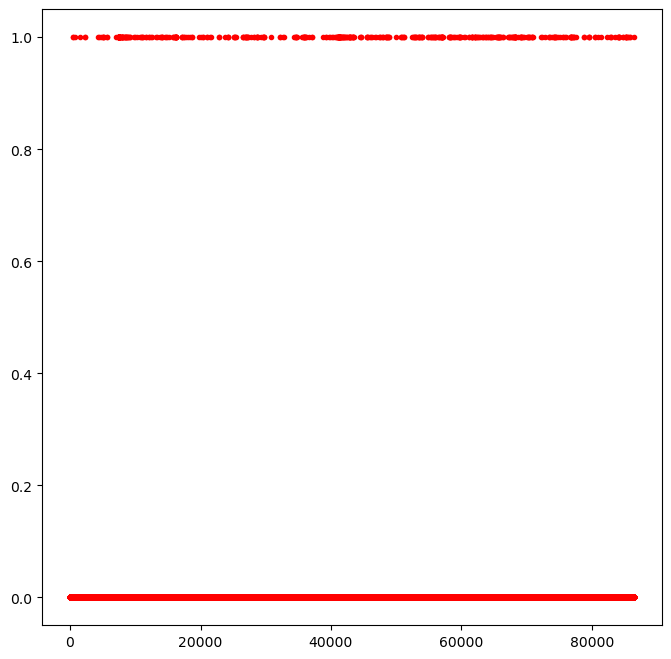

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.plot(tdia,y,'.r')
plt.show()

In [9]:
#seg na hora
thora = time % 3600
print(thora)

[0.000e+00 0.000e+00 1.000e+00 ... 3.588e+03 3.588e+03 3.592e+03]


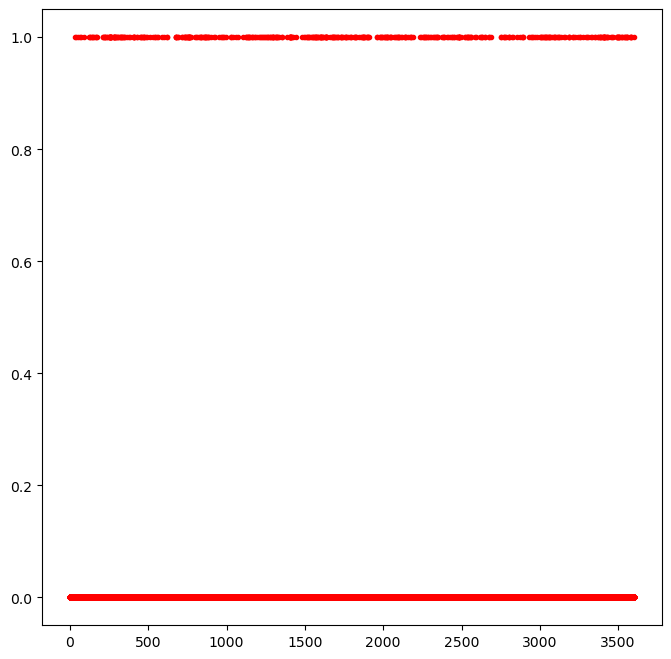

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.plot(thora,y,'.r')
plt.show()

In [11]:
#seg em min
tmin = time % 60
print(tmin)

[ 0.  0.  1. ... 48. 48. 52.]


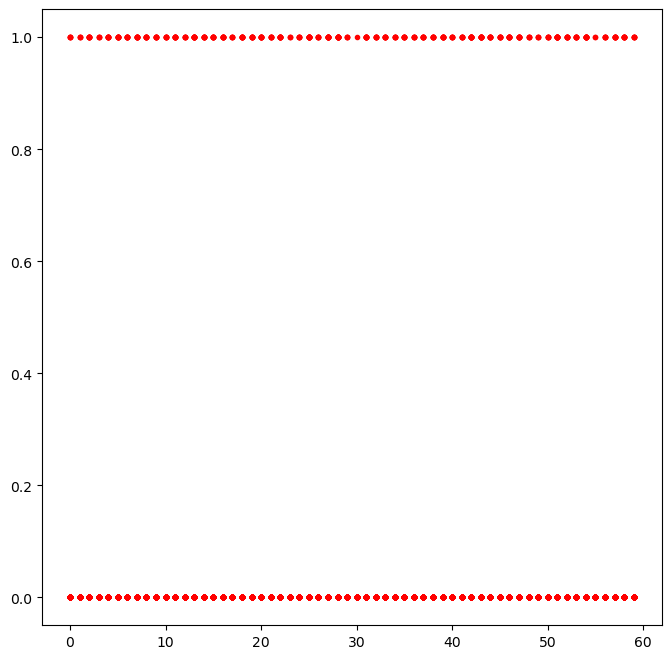

In [12]:

plt.figure(figsize=(8,8))
plt.plot(tmin,y,'.r')
plt.show()

In [13]:
ccfraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


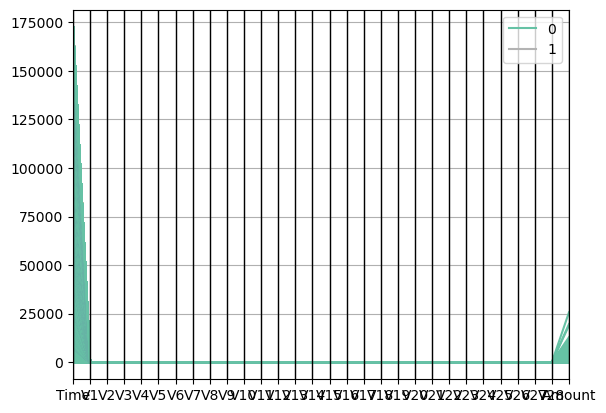

In [14]:
from pandas.plotting import parallel_coordinates
#snscc = sns.load_dataset(ccfraud)
parallel_coordinates(ccfraud, 'Class', colormap=plt.get_cmap("Set2"))
plt.show()

In [15]:
normalized_df=(df-df.mean())/df.std()
normalized_df['Class'] = df['Class']
normalized_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996580,-0.694241,-0.044075,1.672771,0.973364,-0.245116,0.347067,0.193679,0.082637,0.331127,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330891,-0.063781,0.244964,0
1,-1.996580,0.608495,0.161176,0.109797,0.316522,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307376,-0.880075,0.162201,-0.561130,0.320693,0.261069,-0.022256,0.044607,-0.342474,0
2,-1.996558,-0.693499,-0.811576,1.169466,0.268231,-0.364571,1.351451,0.639775,0.207372,-1.378673,...,0.337631,1.063356,1.456317,-1.138090,-0.628536,-0.288446,-0.137137,-0.181021,1.160684,0
3,-1.996558,-0.493324,-0.112169,1.182514,-0.609726,-0.007469,0.936148,0.192070,0.316017,-1.262501,...,-0.147443,0.007267,-0.304776,-1.941024,1.241902,-0.460217,0.155396,0.186188,0.140534,0
4,-1.996537,-0.591329,0.531540,1.021410,0.284655,-0.295015,0.071998,0.479301,-0.226510,0.744325,...,-0.012839,1.100009,-0.220123,0.233250,-0.395201,1.041609,0.543619,0.651815,-0.073403,0


In [16]:
#so normaliza o tempo
normal_df=df
normal_df['Time'] = df['Time']-df['Time'].mean()/df['Time'].std()
normal_df['Time'] = normal_df['Time']/normal_df['Time'].max()
normal_df.head()
normal_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,1.000000,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


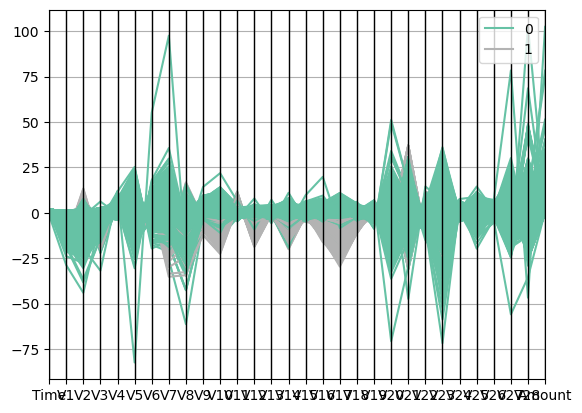

<Figure size 2000x2000 with 0 Axes>

In [17]:
parallel_coordinates(normalized_df, 'Class', colormap=plt.get_cmap("Set2"))
plt.figure(figsize=(20,20))
plt.show()

Selecionamos os bons atributos e podamos o restante, infelizmente o atributo tempo foi completamente inutil para este estudo

In [18]:
#poda ate v9 e a partir de v19 , v7 fica, v13 sai
#as colunas restantes são onde a separação está mais evidente
crop_df = normalized_df
crop_df = crop_df.drop(crop_df.columns[[0, 1, 2, 3, 4, 5, 6, 8, 13, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]], axis=1)

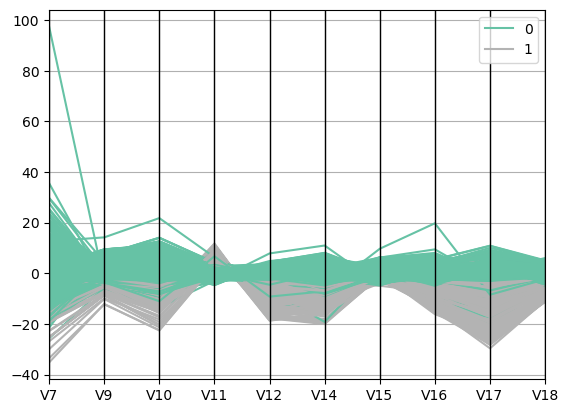

<Figure size 2000x2000 with 0 Axes>

In [19]:
parallel_coordinates(crop_df, 'Class', colormap=plt.get_cmap("Set2"))
plt.figure(figsize=(20,20))
plt.show()

Podemos ver a separação bem definina no grafico acima, mas ainda dá para melhorar.

In [20]:

#inverter o sinal de v11
crop_df['V11'] *= -1
#apagar V15
crop_df = crop_df.drop("V15", axis=1)
crop_df.tail()

,V7,V9,V10,V11,V12,V14,V16,V17,V18,Class
284802,-3.975621,1.742556,4.000708,1.560777,2.714108,4.826792,1.264065,2.344995,0.609218,0
284803,0.019667,0.532298,-0.896291,0.147141,0.916534,-0.704304,-0.812274,-0.030250,-1.456948,0
284804,-0.239939,0.393630,-0.445224,-0.403261,0.063169,-0.532656,0.160588,0.369114,0.472040,0
284805,-0.554671,0.356886,-0.366557,1.894606,-0.963656,0.469045,-0.694522,0.600384,1.329053,0
284806,1.274767,0.442532,-0.840728,1.019345,-0.031538,-0.087958,-0.345357,-0.777520,0.199755,0


In [21]:
#normaliza v7
ncrop_df=crop_df
ncrop_df['V7'] = crop_df['V7']-crop_df['V7'].mean()/crop_df['V7'].std()
ncrop_df['V7'] = ncrop_df['V7']/ncrop_df['V7'].max()
ncrop_df.head()

,V7,V9,V10,V11,V12,V14,V16,V17,V18,Class
0,0.001987,0.331127,0.083385,0.540406,-0.618295,-0.324610,-0.536832,0.244863,0.030770,0
1,-0.000653,-0.232494,-0.153349,-1.580000,1.066087,-0.149982,0.529433,-0.135170,-0.218762,0
2,0.006563,-1.378673,0.190699,-0.611829,0.066137,-0.173114,-3.298230,1.306866,-0.144790,0
3,0.001970,-1.262501,-0.050468,0.221891,0.178371,-0.300360,-1.209294,-0.805443,2.345300,0
4,0.004917,0.744325,0.691624,0.806145,0.538626,-1.168031,-0.515204,-0.279080,-0.045569,0


In [22]:
ncrop_df.shape

(284807, 10)

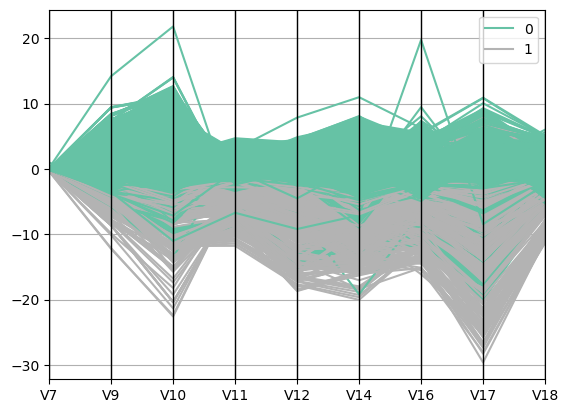

<Figure size 2000x2000 with 0 Axes>

In [23]:
parallel_coordinates(crop_df, 'Class', colormap=plt.get_cmap("Set2"))
plt.figure(figsize=(20,20))
plt.show()

In [24]:
#Aviso de demora p/ a linha comentada abaixo! (+ de 50 mins)
#sns.pairplot(crop_df, hue='Class')

8,10 8,45


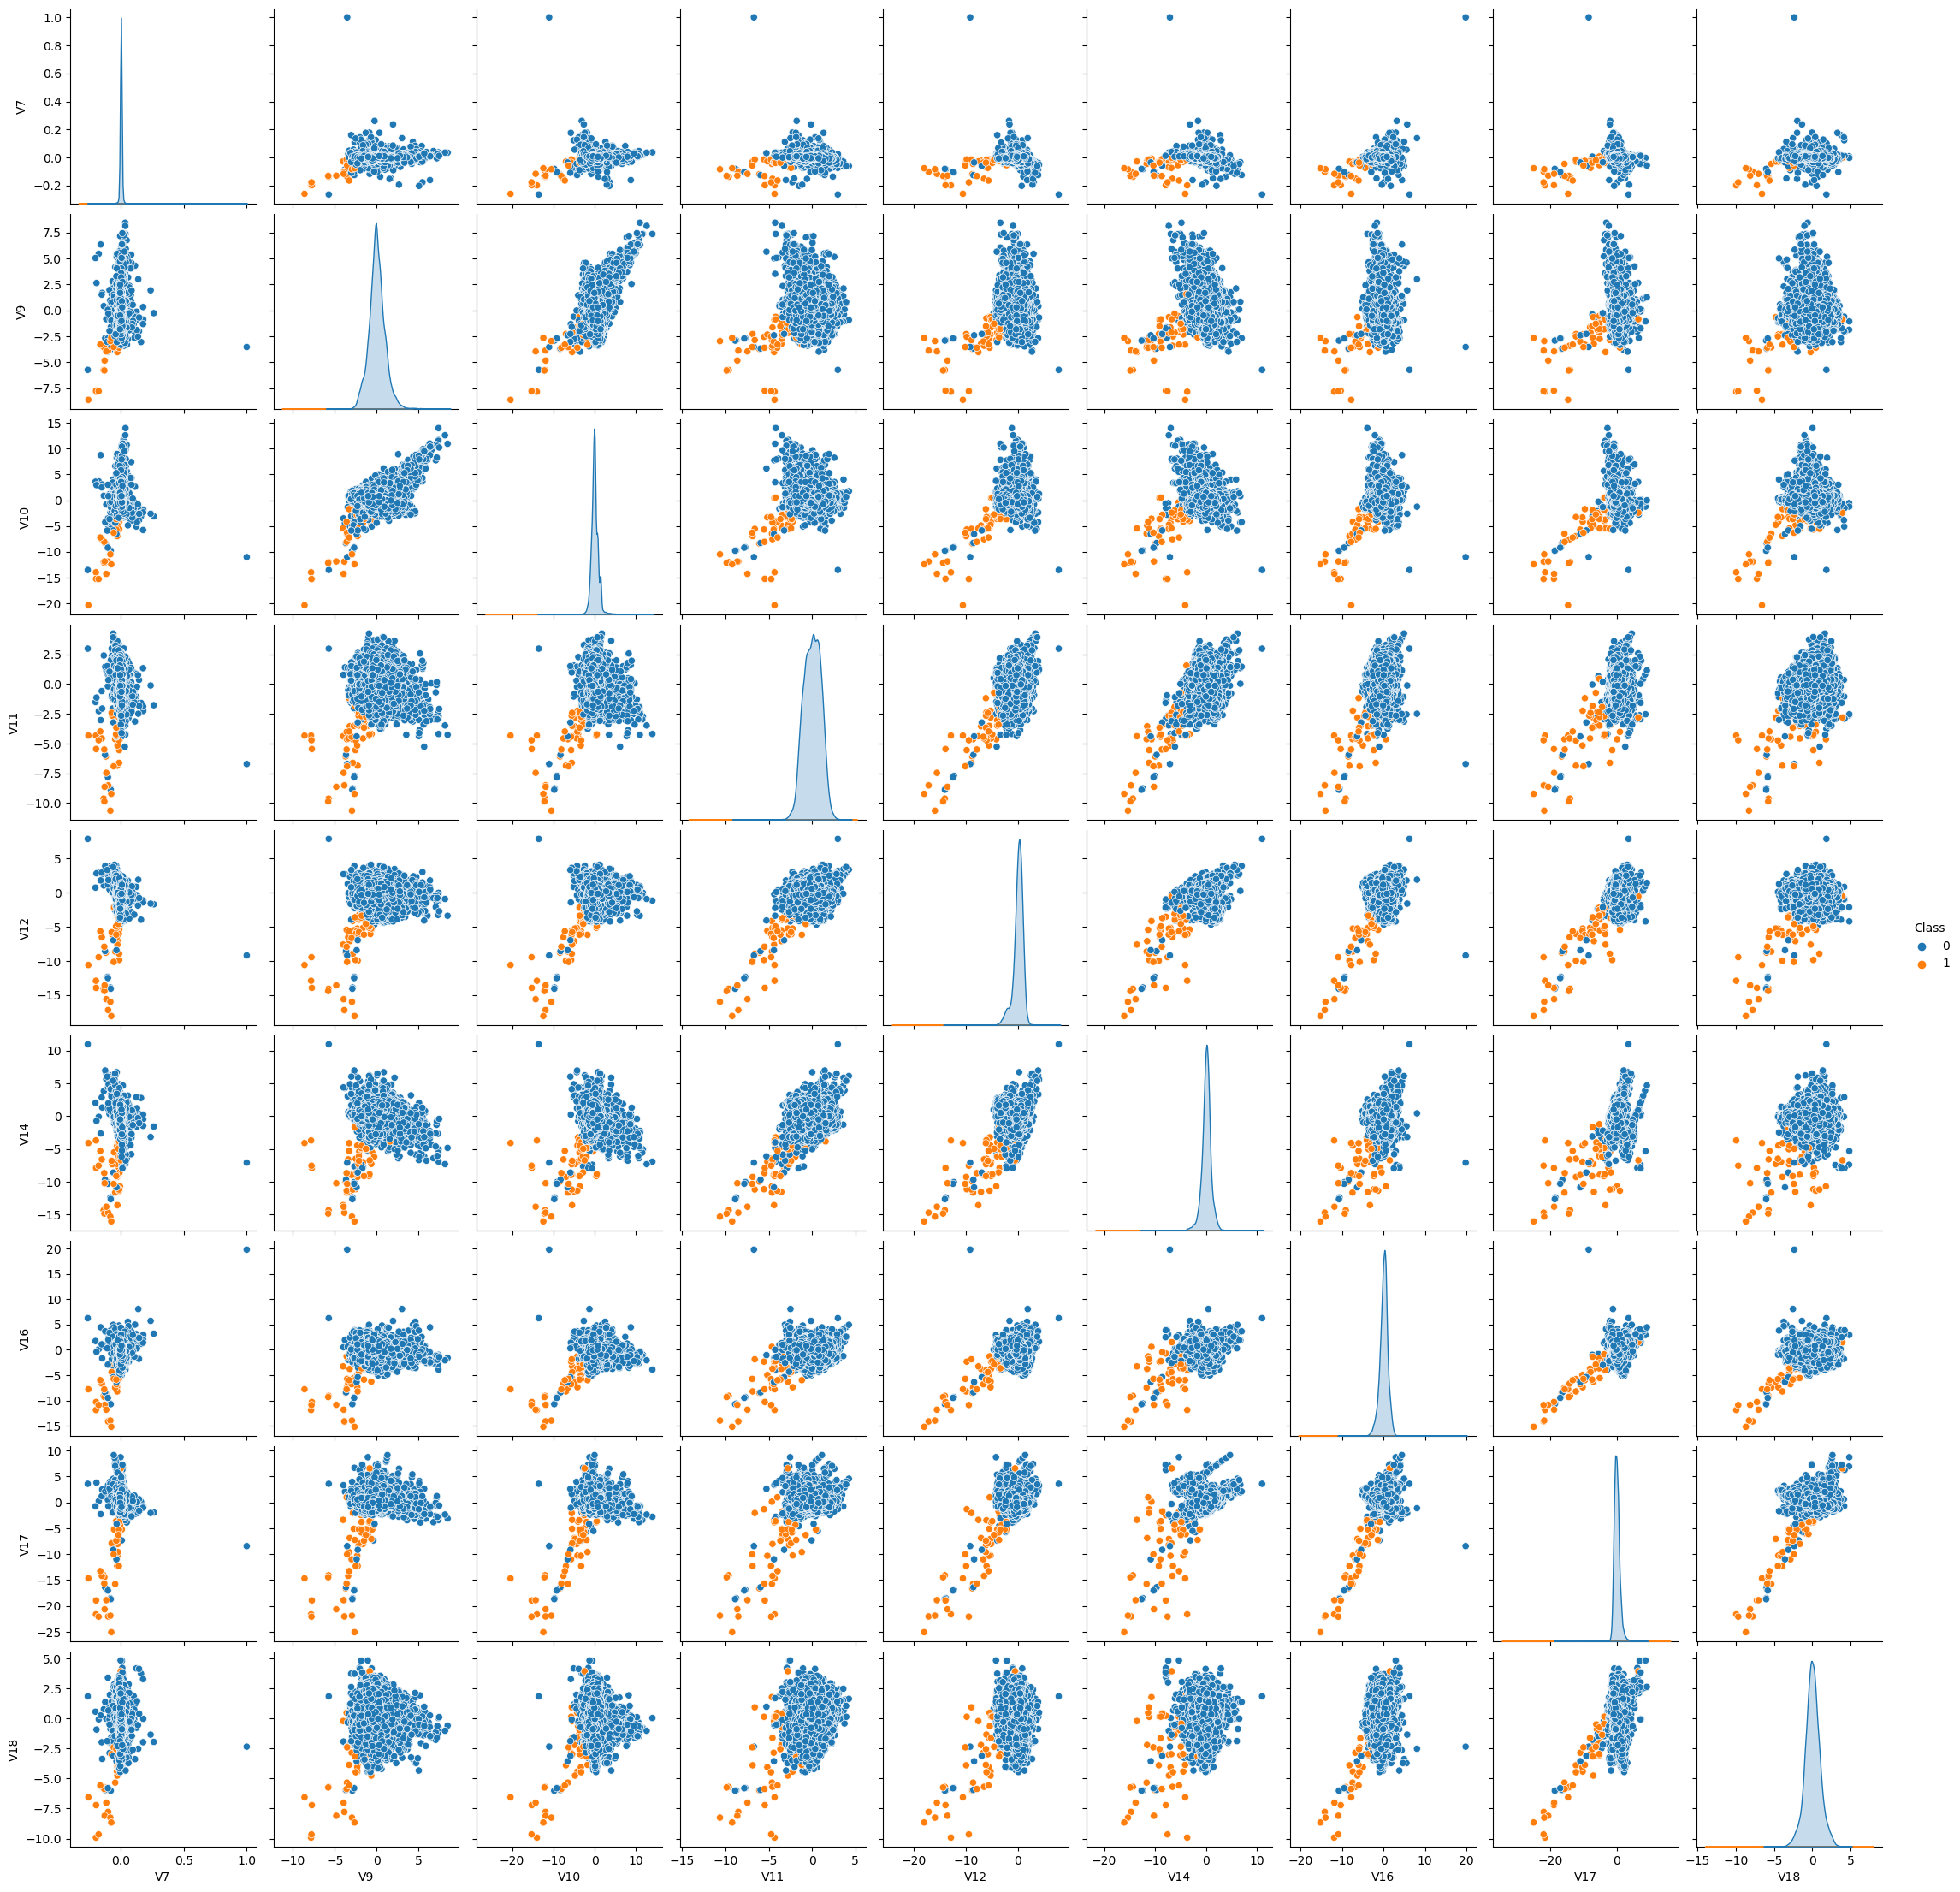

In [25]:
#downsample p/ 50k, codigo anterior passa dos recursos gratis do colab
#aprox. 15 minutos para rodar 50k, menos de 10k é muito baixo, recomendo 50k ou mais
sns.pairplot(crop_df.sample(50000),hue='Class')

OBS: O tempo, que poderia ser um bom atributo, não é nem um pouco util no nosso caso, visto que o intervalo de observações (2 dias) é infinitesimal na escala de tempo necessária para reconhecer padrões na nossa aplicação. Seria muito interessante analisar um dataset com intervalo de observações na escala de anos ou décadas.

# Atividade em sala


In [26]:
from sklearn.datasets import load_iris

In [27]:
data = load_iris()
print (data.data[:10])
print (data.target[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]


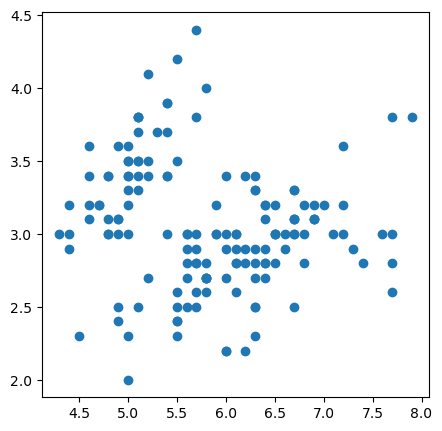

In [28]:
plt.figure(figsize=(5,5))
plt.scatter(data.data[:,0],data.data[:,1])
plt.show()

In [29]:
import seaborn as sns

In [30]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
y=pd.DataFrame(data.target)
y.head()

,0
0,0
1,0
2,0
3,0
4,0


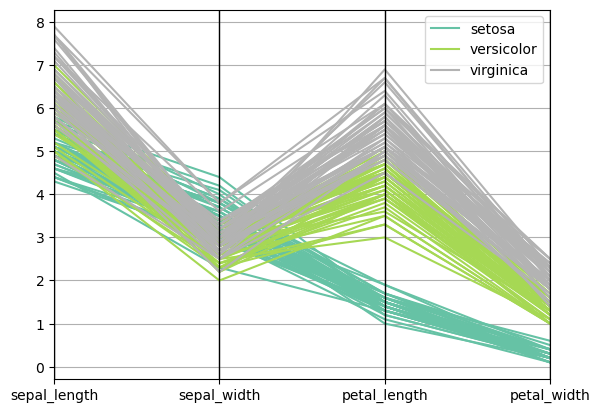

In [32]:

from pandas.plotting import parallel_coordinates

snsdata = sns.load_dataset('iris')
parallel_coordinates(snsdata, 'species', colormap=plt.get_cmap("Set2"))
plt.show()

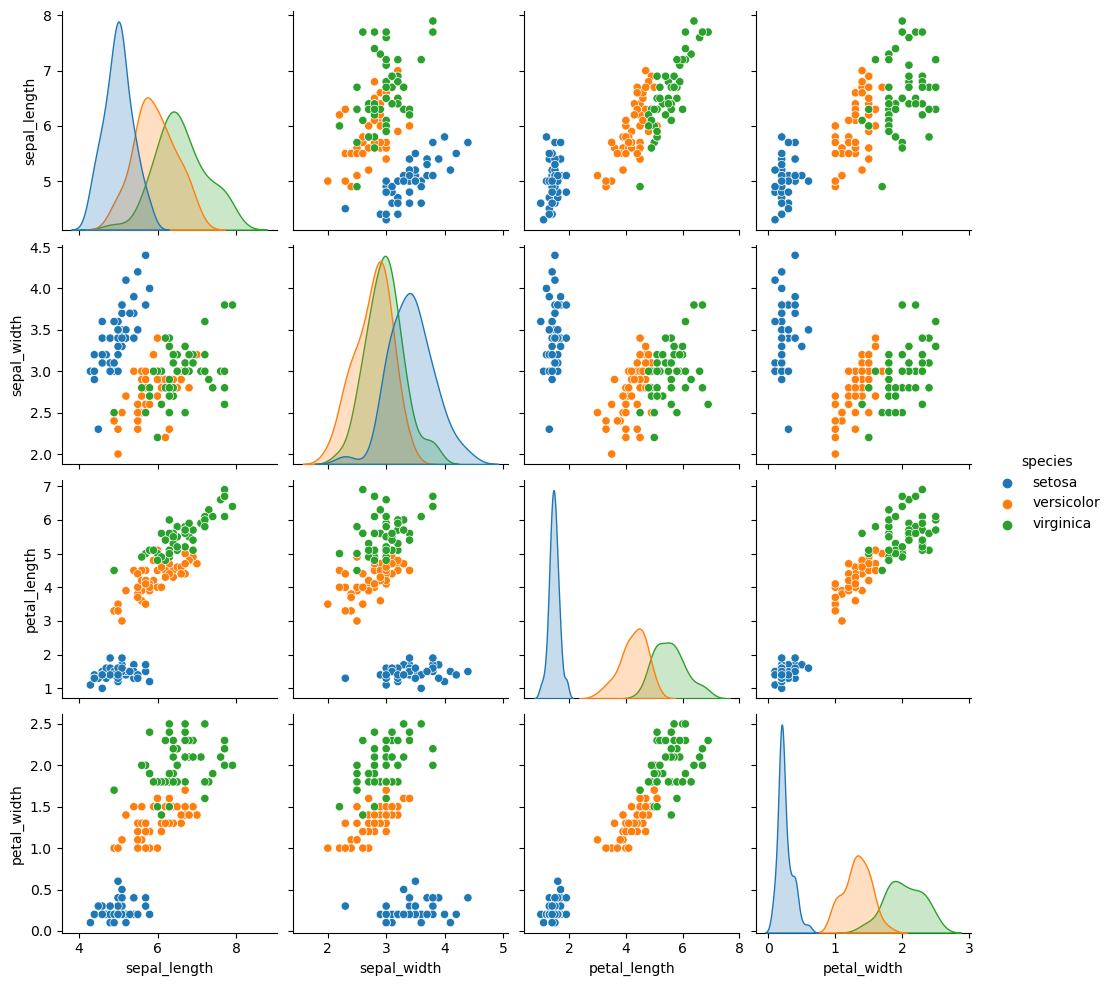

In [33]:
sns.pairplot(snsdata, hue='species')

In [34]:
from sklearn import manifold, datasets
from sklearn.manifold import TSNE
n_neighbors = 12  # neighborhood which is used to recover the locally linear structure
n_components = 2  # number of coordinates for the manifold
data = load_iris()
t_sne = manifold.TSNE(
    n_components=n_components,
    perplexity=30,
    init="random",
    n_iter=250,
    random_state=0,
)
S_t_sne = t_sne.fit_transform(data)

plot_2d(S_t_sne, S_color, "T-distributed Stochastic  \n Neighbor Embedding")

AttributeError: shape